In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error,accuracy_score,mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow import keras
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler

In [7]:
df = pd.read_csv('../data/fullDfNoScale.csv', parse_dates=['date'], index_col=[0])

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
MMdf = pd.read_csv('../data/min_max_df.csv', parse_dates=['date'], index_col=[0])

In [10]:
scaleCheck = pd.DataFrame()
scaleCheck['price'] = df.price
scaleCheck['pred1'] = df.price
scaleCheck['pred2'] = df.price

In [14]:
feats=['price', 'pred1', 'pred2']

In [19]:
scaler = MinMaxScaler()
scaley= pd.DataFrame(scaler.fit_transform(scaleCheck))
scaley.columns = [feats]
scaley.head()

,price,pred1,pred2
0,0.018880,0.018880,0.018880
1,0.060352,0.060352,0.060352
2,0.013382,0.013382,0.013382
3,0.069011,0.069011,0.069011
4,0.056678,0.056678,0.056678


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,7129300520,2014-10-13,0.018880,0.222222,0.066667,0.061503,0.003108,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,6414100192,2014-12-09,0.060352,0.222222,0.233333,0.167046,0.004072,0.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5631500400,2015-02-25,0.013382,0.111111,0.066667,0.030372,0.005743,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2487200875,2014-12-09,0.069011,0.333333,0.333333,0.120729,0.002714,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1954400510,2015-02-18,0.056678,0.222222,0.200000,0.099468,0.004579,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
helper = pd.read_csv('preds.csv', index_col=[0])
helper.head()

,thing1,thing2
0,0.017657,0.015427
1,0.067059,0.077972
2,0.024571,0.020704
3,0.052090,0.059011
4,0.050753,0.050466


In [54]:
helper['true'] = MMdf.price

In [56]:
helper.columns = ['dlPred', 'xgbPred', 'true']

In [57]:
helper.head()

,dlPred,xgbPred,true
0,0.017657,0.015427,0.018880
1,0.067059,0.077972,0.060352
2,0.024571,0.020704,0.013382
3,0.052090,0.059011,0.069011
4,0.050753,0.050466,0.056678


In [58]:
unscaled = scaler.inverse_transform(helper)

In [61]:
unscaled = pd.DataFrame(unscaled)
unscaled.columns = helper.columns

In [62]:
unscaled

,dlPred,xgbPred,true
0,212581.654000,195582.551304,221900.0
1,589124.002880,672302.507780,538000.0
2,265278.500404,235808.426126,180000.0
3,475031.580620,527784.494456,604000.0
4,464838.237944,462652.941946,510000.0
...,...,...,...
21590,471244.285040,484097.316994,360000.0
21591,387431.065712,477661.894710,400000.0
21592,290184.361020,347233.354180,402101.0
21593,438660.616140,400629.046520,400000.0


In [78]:
unscaled['dlResid'] = unscaled.true - unscaled.dlPred
unscaled['pctFromDlTrue'] = abs(unscaled.dlResid / unscaled.true)*100
unscaled['xgbResid'] = unscaled.true - unscaled.xgbPred
unscaled['pctFromXgbTrue'] = abs(unscaled.xgbResid / unscaled.true)*100

In [79]:
unscaled.head(10)

,dlPred,xgbPred,true,dlResid,dlPct,xgbResid,xgbPct,pctFromDlTrue,pctFromXgbTrue
0,2.125817e+05,1.955826e+05,221900.0,9318.346000,4.199345,26317.448696,11.860049,4.199345,11.860049
1,5.891240e+05,6.723025e+05,538000.0,-51124.002880,9.502603,-134302.507780,24.963291,9.502603,24.963291
2,2.652785e+05,2.358084e+05,180000.0,-85278.500404,47.376945,-55808.426126,31.004681,47.376945,31.004681
3,4.750316e+05,5.277845e+05,604000.0,128968.419380,21.352387,76215.505544,12.618461,21.352387,12.618461
4,4.648382e+05,4.626529e+05,510000.0,45161.762056,8.855247,47347.058054,9.283737,8.855247,9.283737
5,1.323402e+06,1.365018e+06,1225000.0,-98402.406500,8.032850,-140018.374060,11.430071,8.032850,11.430071
6,2.472838e+05,2.755003e+05,257500.0,10216.218420,3.967463,-18000.349360,6.990427,3.967463,6.990427
7,2.022914e+05,2.055407e+05,291850.0,89558.556674,30.686502,86309.282830,29.573165,30.686502,29.573165
8,2.676839e+05,2.885231e+05,229500.0,-38183.881652,16.637857,-59023.138498,25.718143,16.637857,25.718143
9,2.834159e+05,3.365624e+05,323000.0,39584.104554,12.255141,-13562.439850,4.198898,12.255141,4.198898


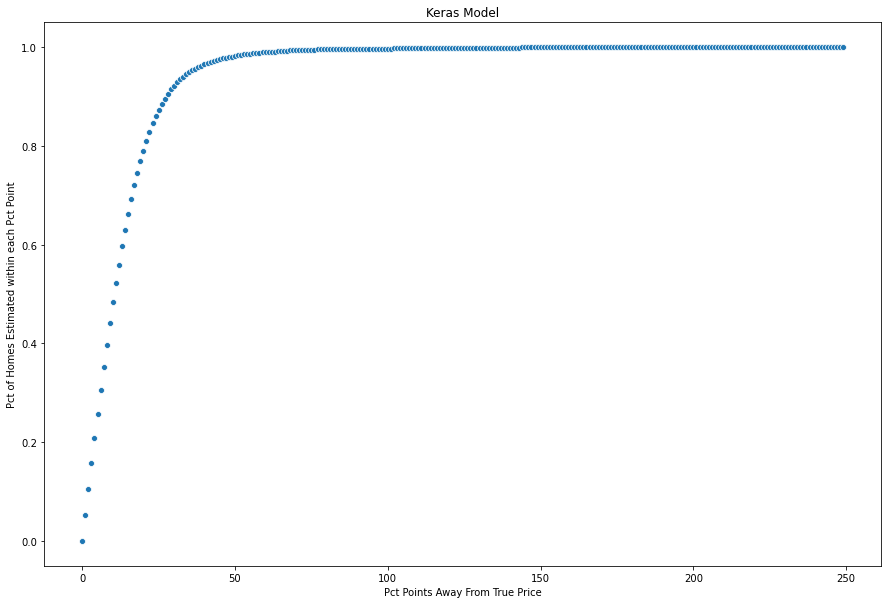

In [84]:
dlDist = [(sum(unscaled.pctFromDlTrue <= test) / len(unscaled)) for test in range(0,250)]
dlDist = pd.DataFrame(dlDist)

#plot
plt.figure(figsize=(15,10))
sns.scatterplot(x=dlDist.index, y=dlDist[0])
plt.title('Keras Model')
plt.ylabel('Pct of Homes Estimated within each Pct Point')
plt.xlabel('Pct Points Away From True Price')
plt.show()

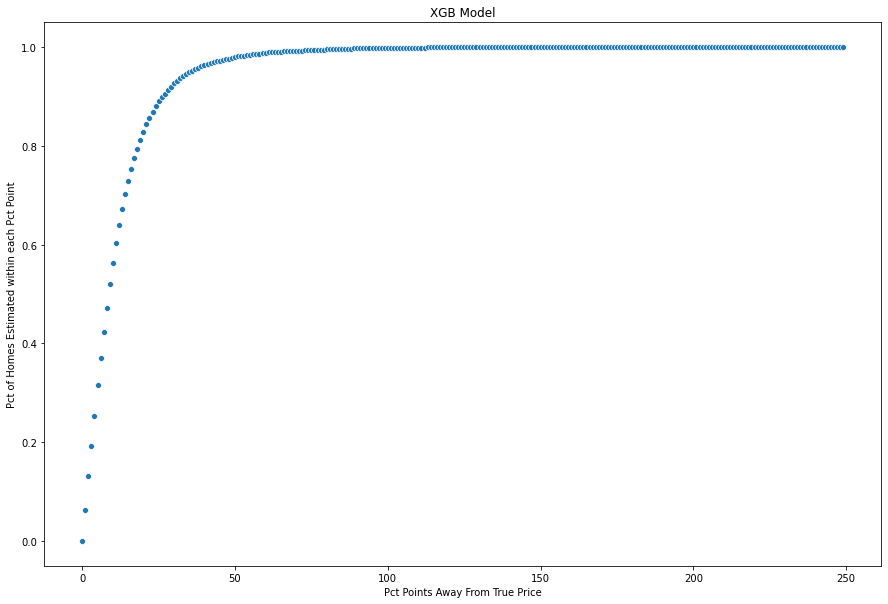

In [85]:
xgbDist = [(sum(unscaled.pctFromXgbTrue <= test) / len(unscaled)) for test in range(0,250)]
xgbDist = pd.DataFrame(xgbDist)

#plot
plt.figure(figsize=(15,10))
sns.scatterplot(x=xgbDist.index, y=xgbDist[0])
plt.title('XGB Model')
plt.ylabel('Pct of Homes Estimated within each Pct Point')
plt.xlabel('Pct Points Away From True Price')
plt.show()

In [86]:
compare = pd.concat([dlDist, xgbDist], axis=1, keys=['Keras', 'xgb'])

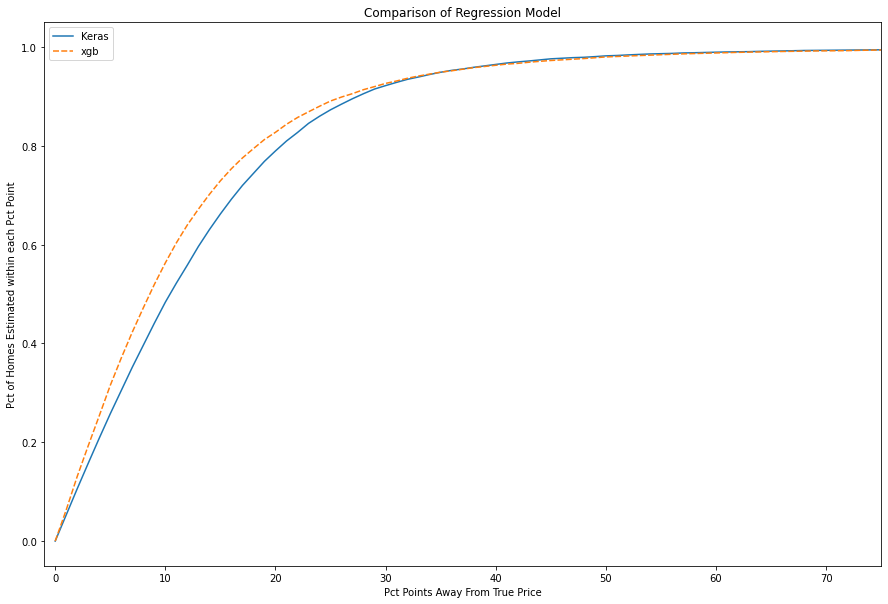

In [87]:
plt.figure(figsize=(15,10))
sns.lineplot(data=compare)
plt.title('Comparison of Regression Model')
plt.ylabel('Pct of Homes Estimated within each Pct Point')
plt.xlabel('Pct Points Away From True Price')
plt.xlim(-1,75)
plt.show()

In [88]:
compare.head()

,Keras,xgb
,0,0
0,0.000000,0.000000
1,0.052975,0.063209
2,0.106043,0.130956
3,0.157583,0.193054
4,0.208289,0.253670
